# Prediksi Jenis Buah Menggunakan Ciri Fisik Buah

### Penjelasan Kolom:
- Acidity: Tingkat keasaman buah.
- Firmness: Tingkat kekerasan buah.
- Sweetness: Tingkat kemanisan buah.
- Weight: Berat buah.
- Water_Content: Persentase kandungan air dalam buah.
- Acid_Firm_Ratio: Rasio antara Acidity dan Firmness.
- Sweet_Acid_Balance: Selisih antara tingkat kemanisan dan keasaman.
- Density_Index: Rasio berat terhadap kandungan air.
- Fruit_Name: Kolom target yang menunjukkan jenis buah.


### Import Library 

In [461]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")
sns.set(style='darkgrid', font_scale=1.1)

### Overview Dataset

In [462]:
try:
 df = pd.read_csv("fruit.csv")
 print("Berhasil membaca data")
except Exception as e:
 print(f"Gagal Membaca data as {e}")

Berhasil membaca data


In [463]:
df.head()

,Acidity,Firmness,Sweetness,Weight,Water_Content,Fruit_Name,Acid_Firm_Ratio,Sweet_Acid_Balance,Density_Index
0,3.74,3.14,6.94,173.40,84.92,Apple,1.19,3.20,2.02
1,4.37,2.79,6.10,165.28,88.98,Orange,1.57,1.73,1.84
2,4.09,2.80,6.74,183.04,74.89,Orange,1.46,2.65,2.41
3,4.60,2.76,6.57,192.92,71.71,Apple,1.67,1.97,2.65
4,1.87,4.64,7.84,185.15,72.72,Apple,0.40,5.97,2.51


In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Acidity             1211 non-null   float64
 1   Firmness            1211 non-null   float64
 2   Sweetness           1212 non-null   float64
 3   Weight              1213 non-null   float64
 4   Water_Content       1213 non-null   float64
 5   Fruit_Name          1220 non-null   object 
 6   Acid_Firm_Ratio     1198 non-null   float64
 7   Sweet_Acid_Balance  1198 non-null   float64
 8   Density_Index       1206 non-null   float64
dtypes: float64(8), object(1)
memory usage: 85.9+ KB


In [465]:
df.duplicated().sum()

np.int64(20)

In [466]:
df = df.drop_duplicates()

In [467]:
df.isnull().sum()

Acidity                9
Firmness               9
Sweetness              8
Weight                 7
Water_Content          7
Fruit_Name             0
Acid_Firm_Ratio       22
Sweet_Acid_Balance    22
Density_Index         14
dtype: int64

In [468]:
df.columns

Index(['Acidity', 'Firmness', 'Sweetness', 'Weight', 'Water_Content',
       'Fruit_Name', 'Acid_Firm_Ratio', 'Sweet_Acid_Balance', 'Density_Index'],
      dtype='object')

In [469]:
mean = df[['Acidity', 'Firmness', 'Sweetness', 'Weight', 'Water_Content', 'Acid_Firm_Ratio', 'Sweet_Acid_Balance', 'Density_Index']].mean()
mean

Acidity                 3.442483
Firmness                3.191948
Sweetness               7.202583
Weight                167.697209
Water_Content          78.876404
Acid_Firm_Ratio         1.231604
Sweet_Acid_Balance      3.759092
Density_Index           2.133735
dtype: float64

In [470]:
clean = df.copy()

In [471]:
clean[['Acidity', 'Firmness', 'Sweetness', 'Weight', 'Water_Content', 'Acid_Firm_Ratio', 'Sweet_Acid_Balance', 'Density_Index']] = df[['Acidity', 'Firmness', 'Sweetness', 'Weight', 'Water_Content', 'Acid_Firm_Ratio', 'Sweet_Acid_Balance', 'Density_Index']].fillna(mean)

In [472]:
clean.isnull().sum()

Acidity               0
Firmness              0
Sweetness             0
Weight                0
Water_Content         0
Fruit_Name            0
Acid_Firm_Ratio       0
Sweet_Acid_Balance    0
Density_Index         0
dtype: int64

In [473]:
clean

,Acidity,Firmness,Sweetness,Weight,Water_Content,Fruit_Name,Acid_Firm_Ratio,Sweet_Acid_Balance,Density_Index
0,3.74,3.14,6.94,173.40,84.92,Apple,1.19,3.20,2.02
1,4.37,2.79,6.10,165.28,88.98,Orange,1.57,1.73,1.84
2,4.09,2.80,6.74,183.04,74.89,Orange,1.46,2.65,2.41
3,4.60,2.76,6.57,192.92,71.71,Apple,1.67,1.97,2.65
4,1.87,4.64,7.84,185.15,72.72,Apple,0.40,5.97,2.51
...,...,...,...,...,...,...,...,...,...
1195,4.39,2.52,8.16,150.51,60.49,Orange,1.74,3.77,2.45
1196,4.78,2.34,7.86,156.76,88.12,Orange,2.04,3.08,1.76
1197,4.23,1.53,9.27,150.06,83.77,Orange,2.76,5.04,1.77
1198,3.89,0.74,9.12,139.35,96.12,Orange,5.26,5.23,1.43


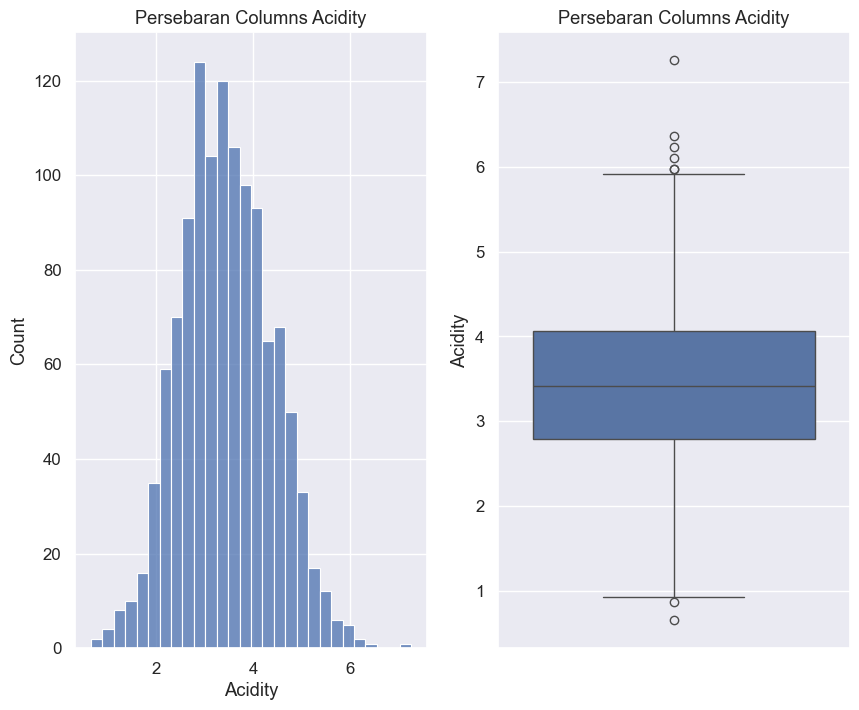

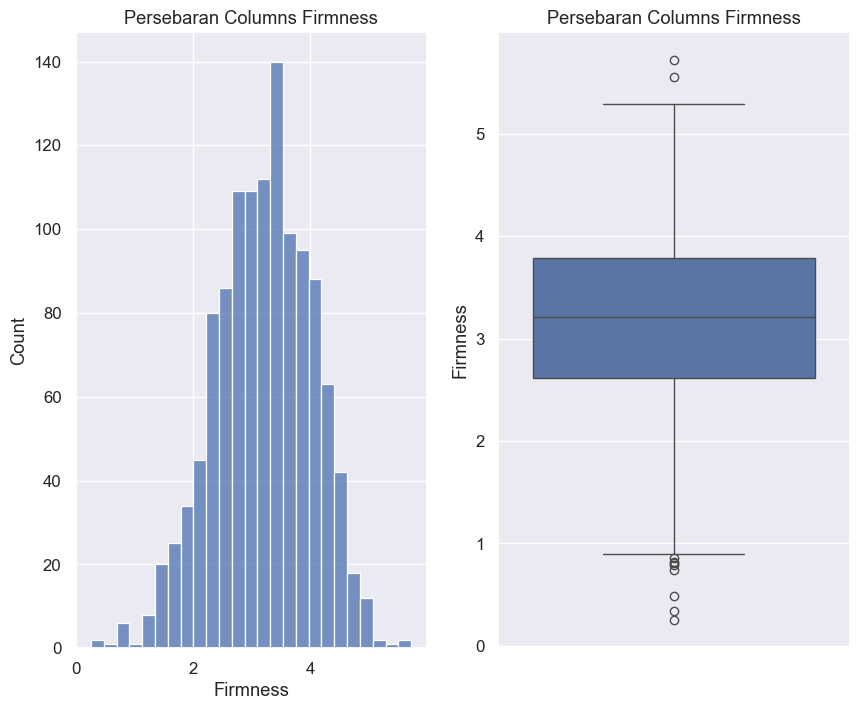

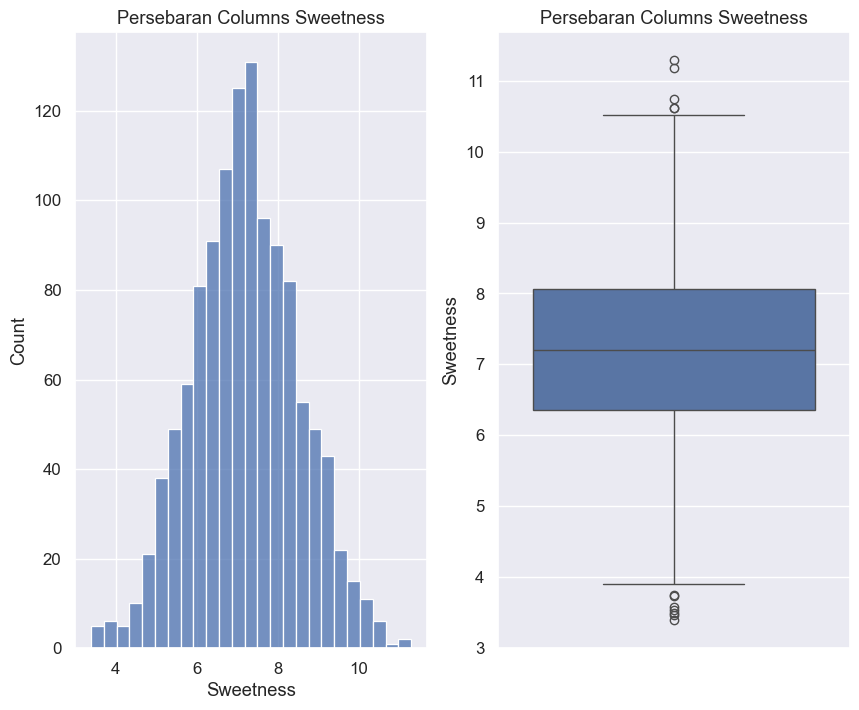

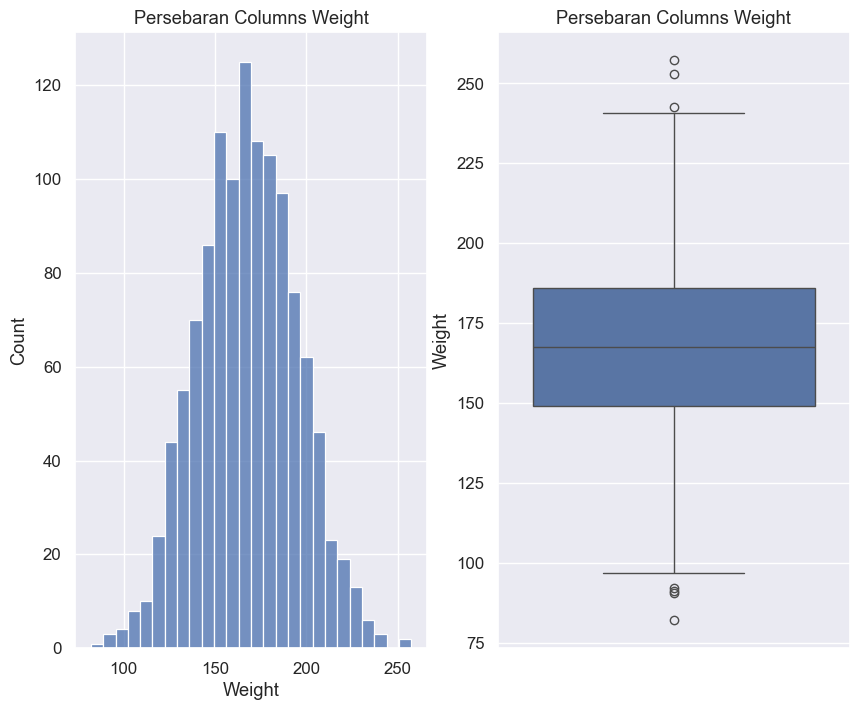

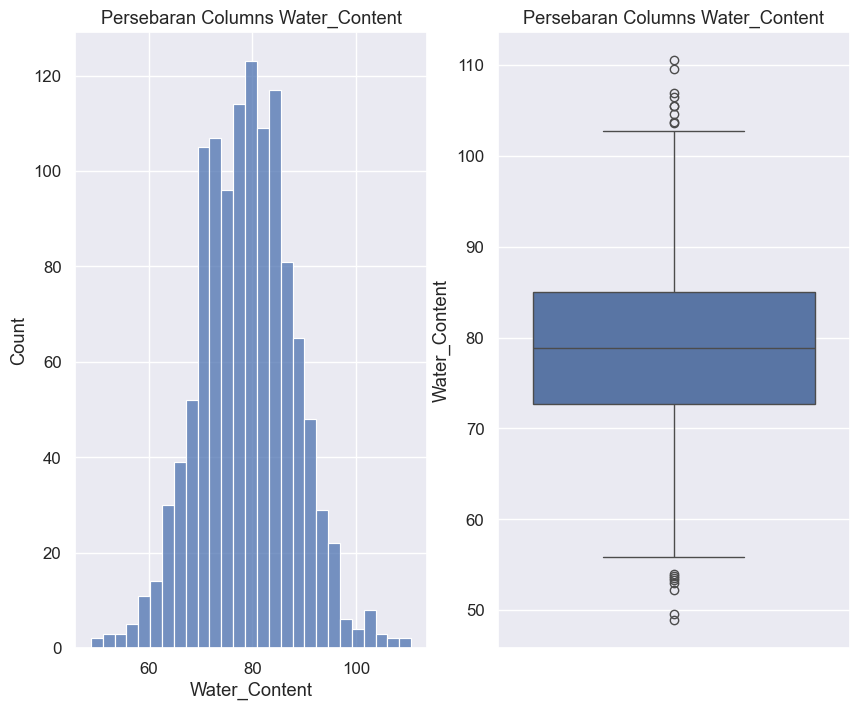

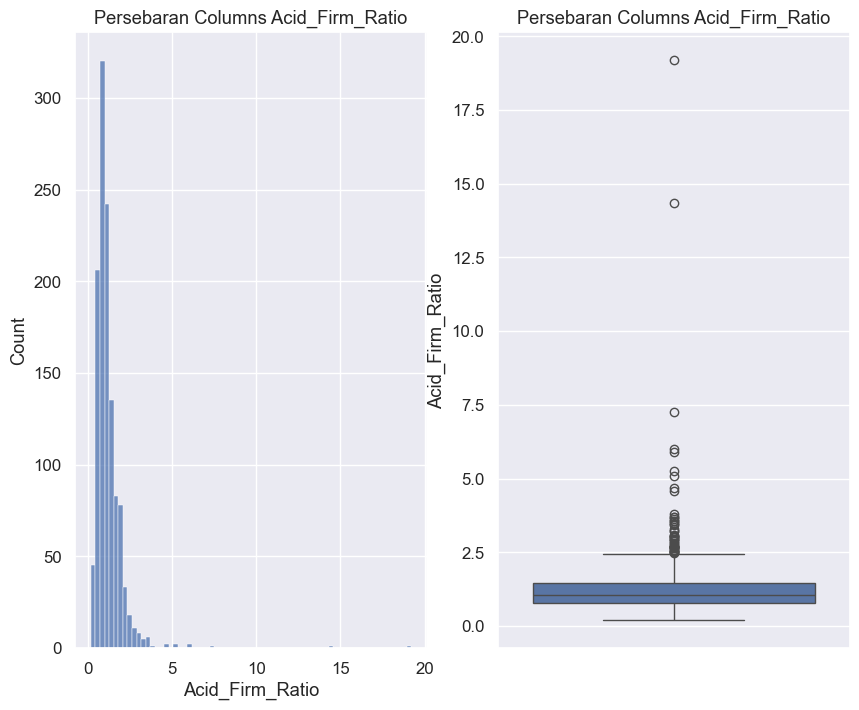

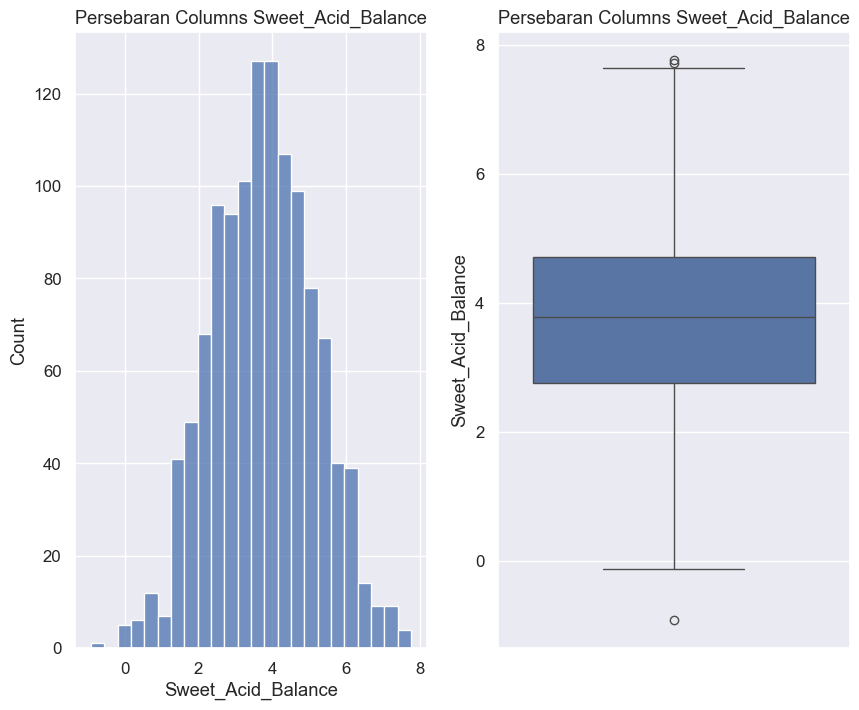

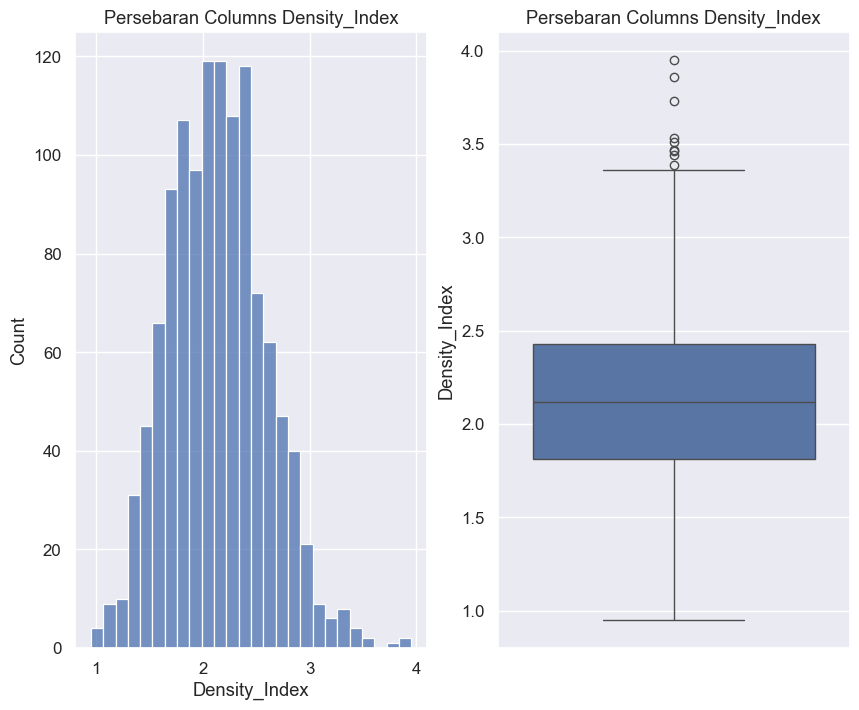

In [474]:
for col in clean.select_dtypes(include='number'):
 fig, axes = plt.subplots(1,2, figsize=(10, 8))
 sns.histplot(clean[col], ax = axes[0])
 axes[0].set_title(f"Persebaran Columns {col}")

 sns.boxplot(clean[col], ax = axes[1])
 axes[1].set_title(f"Persebaran Columns {col}")

In [475]:
num = clean.select_dtypes(include='number')

In [476]:
for col in num:
 q1 = clean[col].quantile(0.25)
 q3 = clean[col].quantile(0.75)
 IQR = q3 - q1

 lb = q1 - 1.5 * IQR
 ub = q3 + 1.5 * IQR

 outlier = clean[(num[col] < lb) | (num[col] > ub)]

 clean[col] = np.where(clean[col] < lb, lb, clean[col])
 clean[col] = np.where(clean[col] > ub, ub, clean[col])
                  

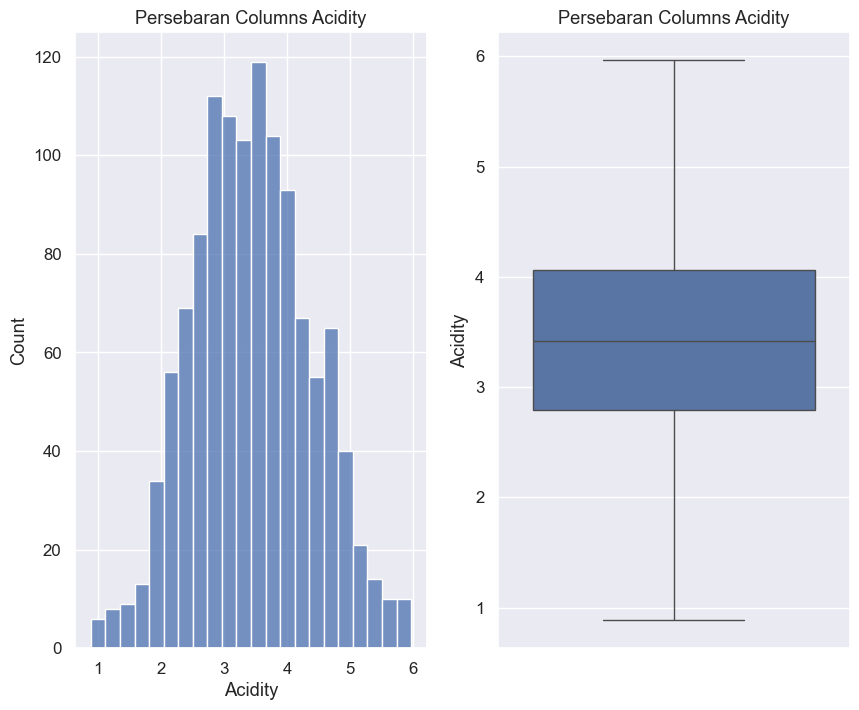

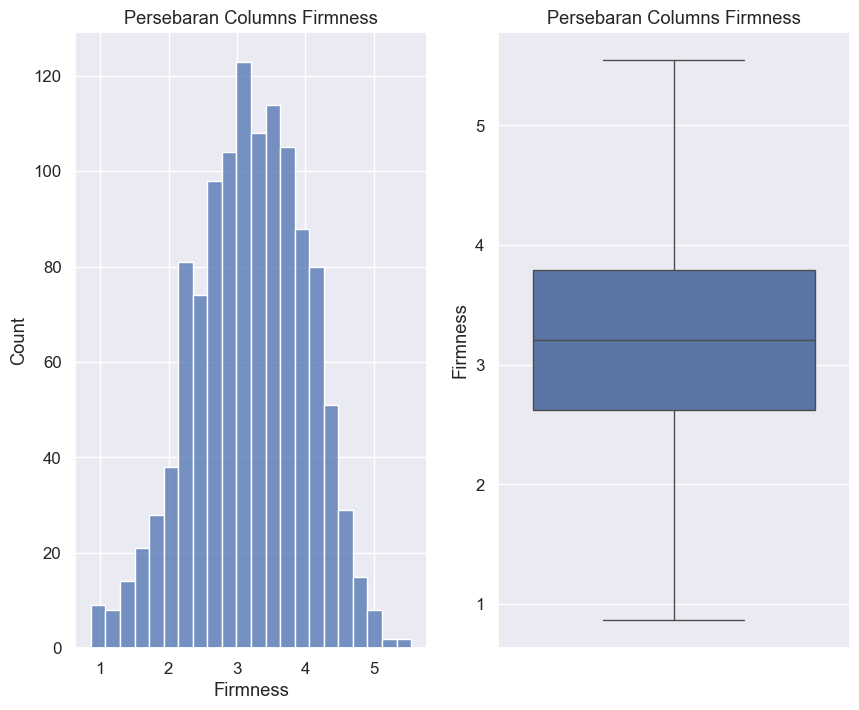

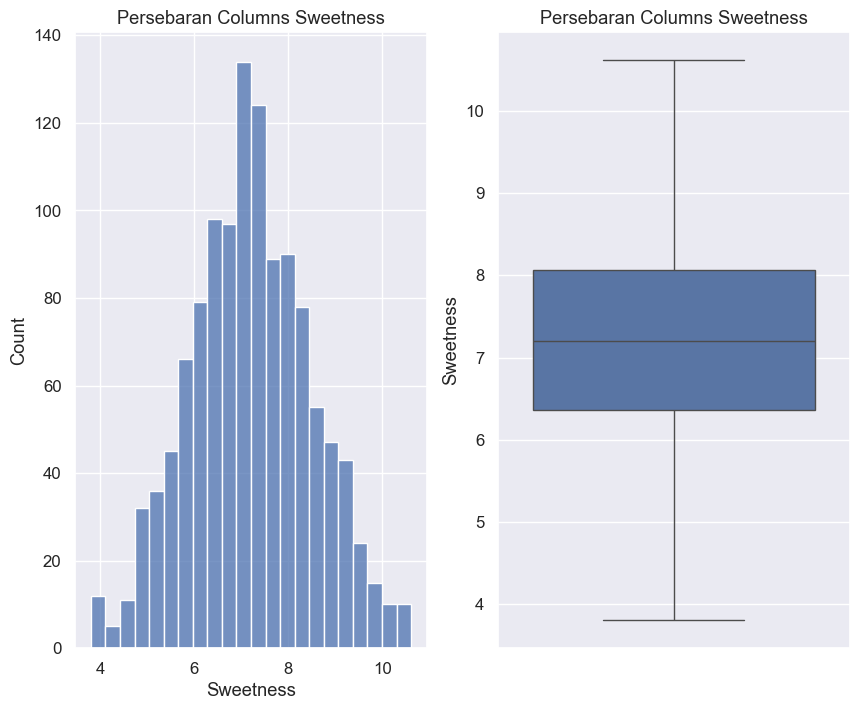

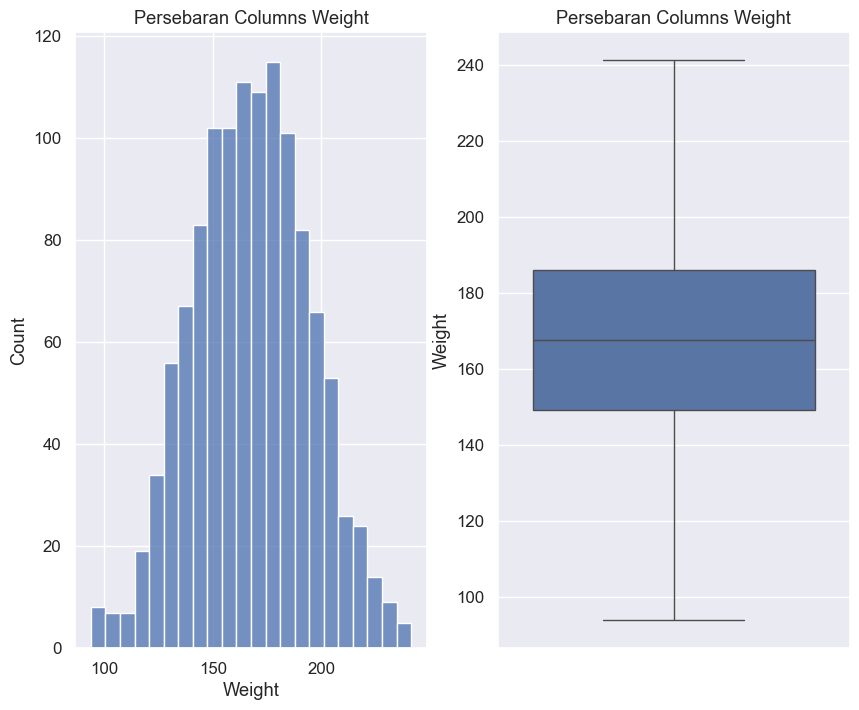

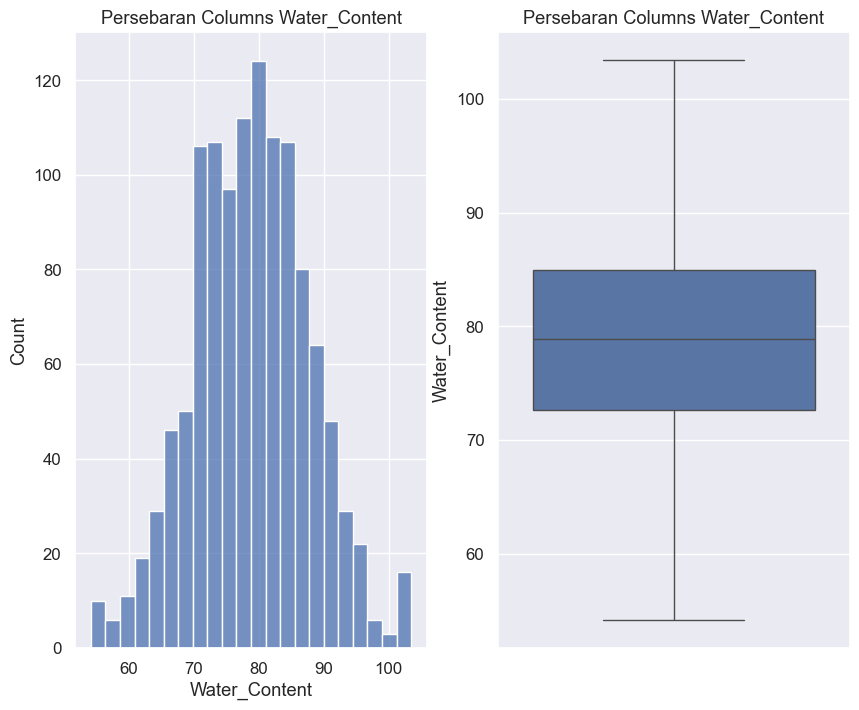

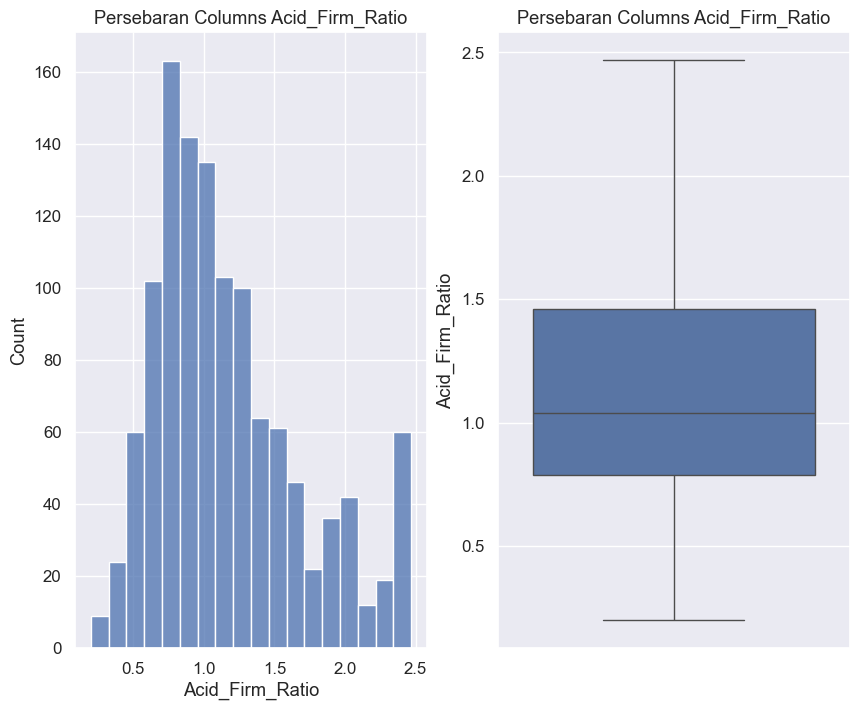

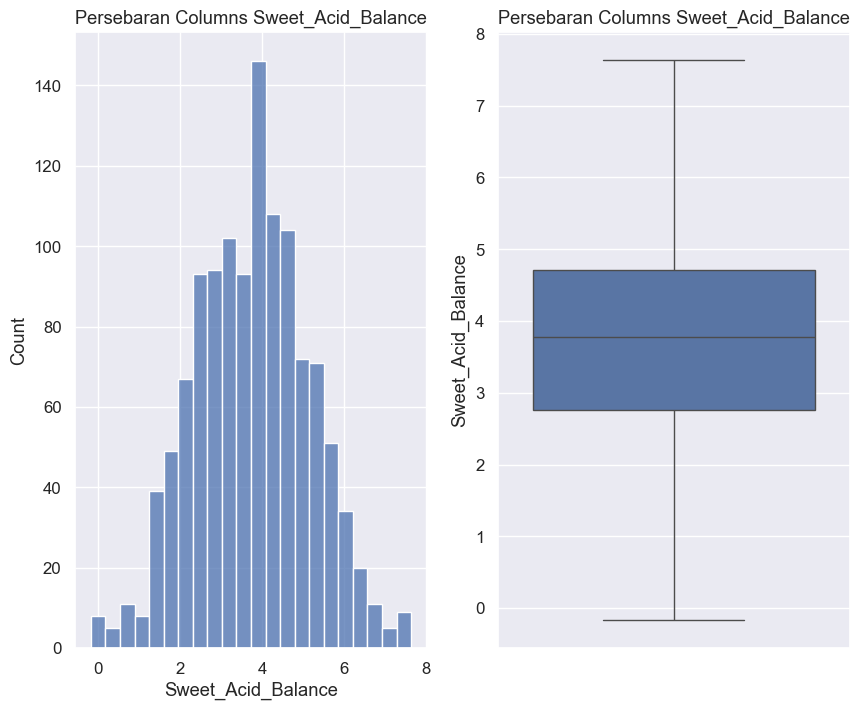

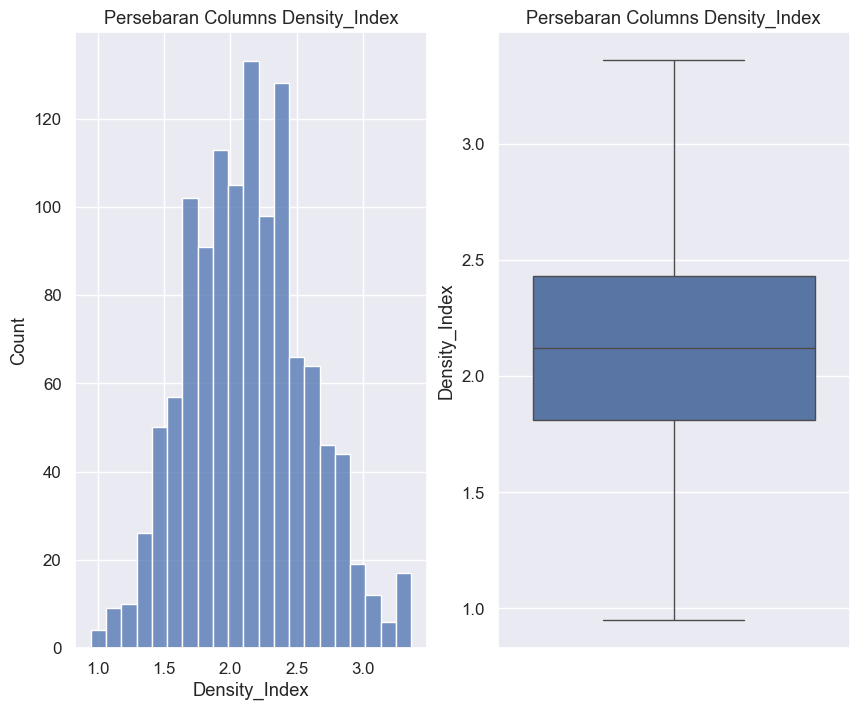

In [477]:
for col in clean.select_dtypes(include='number'):
 fig, axes = plt.subplots(1,2, figsize=(10, 8))
 sns.histplot(clean[col], ax = axes[0])
 axes[0].set_title(f"Persebaran Columns {col}")

 sns.boxplot(clean[col], ax = axes[1])
 axes[1].set_title(f"Persebaran Columns {col}")

In [478]:
clean.describe().T.style.format("{:.2f}").background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Acidity,1200.00,3.44,0.94,0.89,2.79,3.42,4.06,5.96
Firmness,1200.00,3.19,0.82,0.87,2.62,3.21,3.79,5.54
Sweetness,1200.00,7.20,1.30,3.81,6.36,7.20,8.06,10.62
Weight,1200.00,167.69,26.81,93.91,149.16,167.70,186.00,241.26
Water_Content,1200.00,78.87,8.94,54.16,72.64,78.88,84.96,103.45
Acid_Firm_Ratio,1200.00,1.17,0.53,0.20,0.79,1.04,1.46,2.47
Sweet_Acid_Balance,1200.00,3.76,1.40,-0.17,2.76,3.77,4.71,7.63
Density_Index,1200.00,2.13,0.45,0.95,1.81,2.12,2.43,3.36


Fungsi std (Standar Deviasi) : 

Mengukur Sebaran Data (Variabilitas)
Fungsi paling dasar adalah untuk melihat apakah data kamu mengumpul di satu titik atau menyebar luas.

Std Kecil: Artinya data cenderung homogen (mirip satu sama lain) dan berkumpul dekat dengan rata-rata (mean).

Std Besar: Artinya data cenderung heterogen (sangat bervariasi) dan menyebar jauh dari rata-rata

In [479]:
clean.skew(numeric_only=True)

Acidity               0.125647
Firmness             -0.203617
Sweetness             0.041780
Weight                0.022537
Water_Content         0.029226
Acid_Firm_Ratio       0.869101
Sweet_Acid_Balance    0.017326
Density_Index         0.213684
dtype: float64

### EDA (Exploratory Data Analysis)

In [480]:
clean.columns

Index(['Acidity', 'Firmness', 'Sweetness', 'Weight', 'Water_Content',
       'Fruit_Name', 'Acid_Firm_Ratio', 'Sweet_Acid_Balance', 'Density_Index'],
      dtype='object')

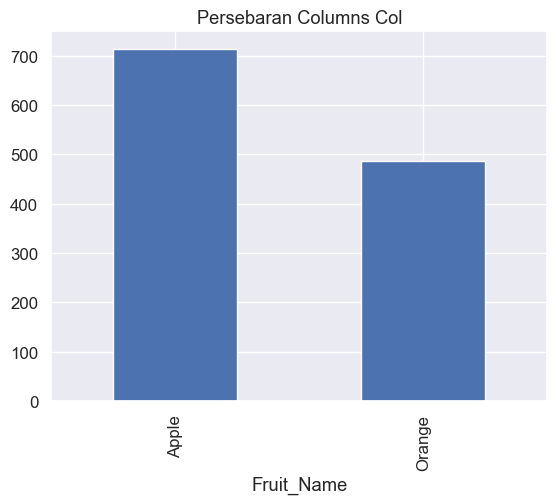

In [481]:
clean['Fruit_Name'].value_counts().plot(kind='bar').set_title("Persebaran Columns Col")
plt.show()

In [482]:
buah = clean['Fruit_Name'].value_counts()

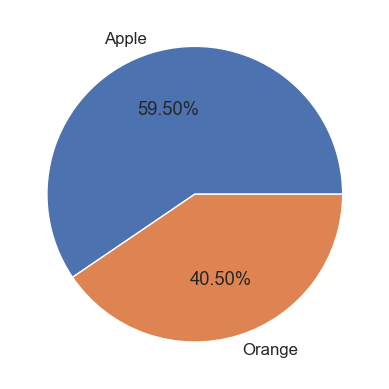

In [483]:
plt.pie(buah, labels=buah.index, autopct="%.2f%%")
plt.show()

In [484]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Acidity             1200 non-null   float64
 1   Firmness            1200 non-null   float64
 2   Sweetness           1200 non-null   float64
 3   Weight              1200 non-null   float64
 4   Water_Content       1200 non-null   float64
 5   Fruit_Name          1200 non-null   object 
 6   Acid_Firm_Ratio     1200 non-null   float64
 7   Sweet_Acid_Balance  1200 non-null   float64
 8   Density_Index       1200 non-null   float64
dtypes: float64(8), object(1)
memory usage: 93.8+ KB


In [485]:
clean['Fruit_Name'].unique()

array(['Apple', 'Orange'], dtype=object)

array([[<Axes: title={'center': 'Acidity'}>,
        <Axes: title={'center': 'Firmness'}>,
        <Axes: title={'center': 'Sweetness'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Water_Content'}>,
        <Axes: title={'center': 'Acid_Firm_Ratio'}>],
       [<Axes: title={'center': 'Sweet_Acid_Balance'}>,
        <Axes: title={'center': 'Density_Index'}>, <Axes: >]],
      dtype=object)

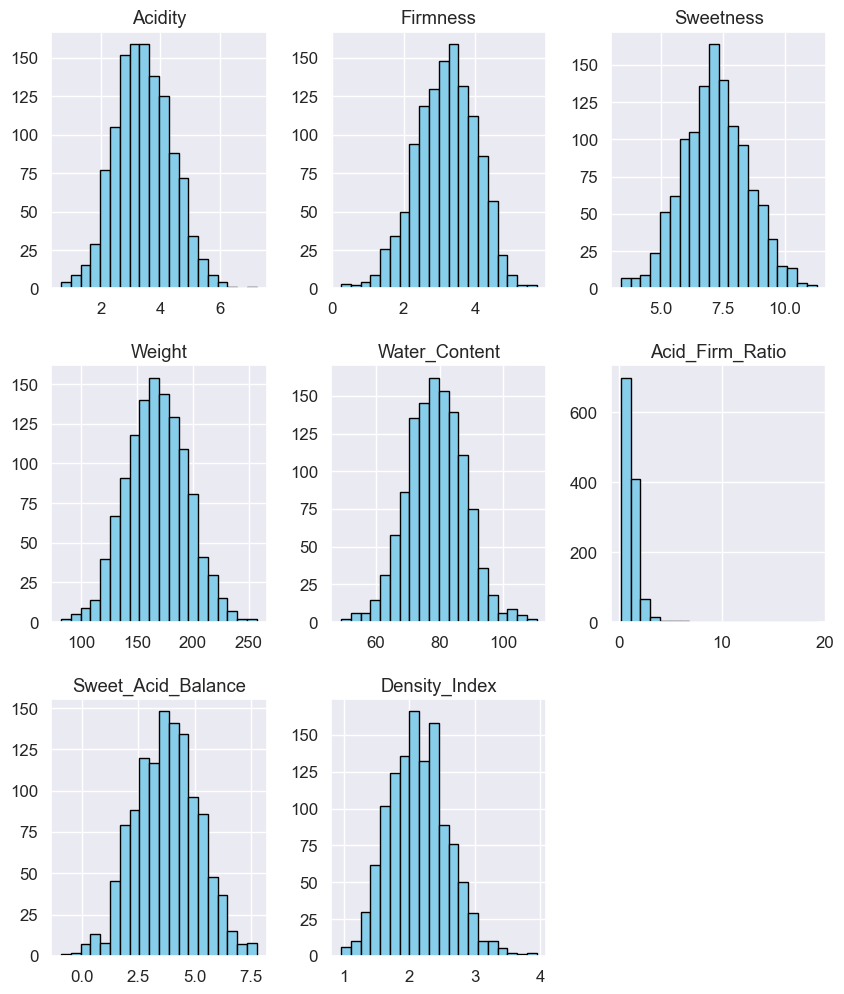

In [486]:
num.hist(bins=20, color='skyblue', edgecolor='black', figsize=(10, 12))

In [487]:
df.columns

Index(['Acidity', 'Firmness', 'Sweetness', 'Weight', 'Water_Content',
       'Fruit_Name', 'Acid_Firm_Ratio', 'Sweet_Acid_Balance', 'Density_Index'],
      dtype='object')

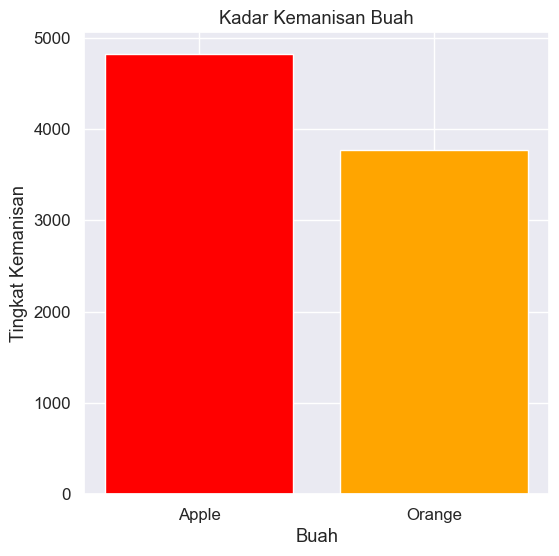

In [488]:
Fruit_sweetness = df.groupby('Fruit_Name')['Sweetness'].sum()
Warna_Buah = ['red', 'orange']

plt.figure(figsize=(6, 6))
plt.bar(Fruit_sweetness.index, Fruit_sweetness.values, color=Warna_Buah)
plt.title('Kadar Kemanisan Buah')
plt.ylabel("Tingkat Kemanisan")
plt.xlabel("Buah")
plt.show()

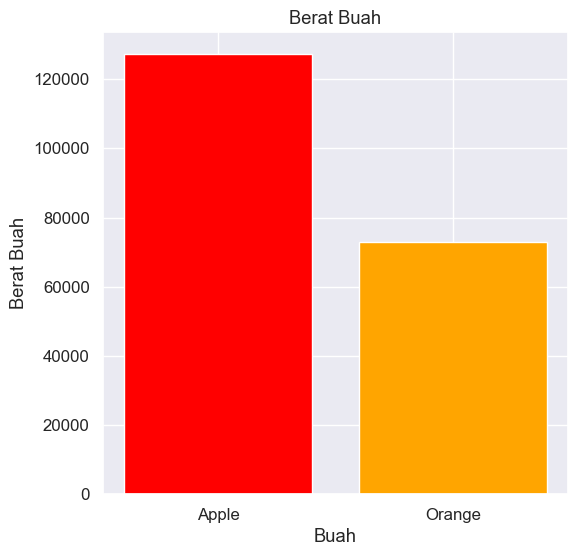

In [489]:
Fruit_Weight = df.groupby('Fruit_Name')['Weight'].sum()
Warna_Buah = ['red', 'orange']

plt.figure(figsize=(6, 6))
plt.bar(Fruit_Weight.index, Fruit_Weight.values, color=Warna_Buah)
plt.title('Berat Buah')
plt.ylabel("Berat Buah")
plt.xlabel("Buah")
plt.show()

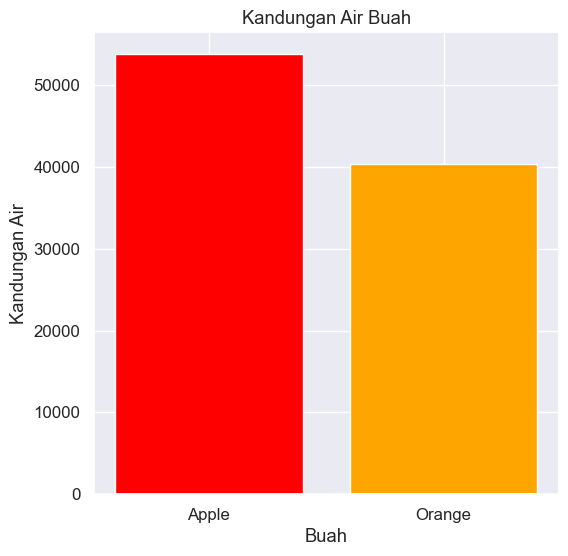

In [490]:
Fruit_Water = df.groupby('Fruit_Name')['Water_Content'].sum()
Warna_Buah = ['red', 'orange']

plt.figure(figsize=(6, 6))
plt.bar(Fruit_Water.index, Fruit_Water.values, color=Warna_Buah)
plt.title('Kandungan Air Buah')
plt.ylabel("Kandungan Air")
plt.xlabel("Buah")
plt.show()

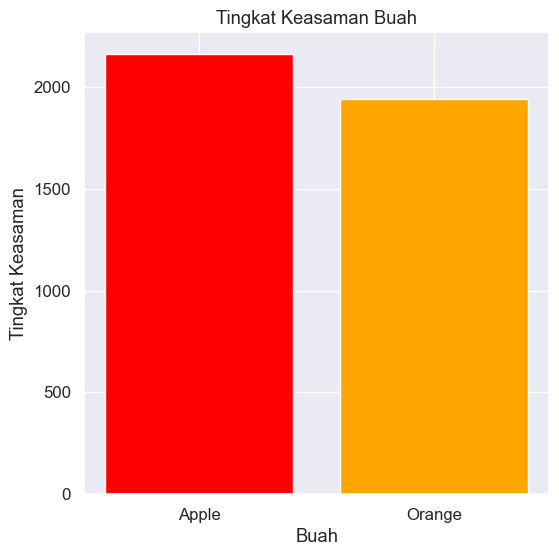

In [491]:
Fruit_Acidity = df.groupby('Fruit_Name')['Acidity'].sum()
Warna_Buah = ['red', 'orange']

plt.figure(figsize=(6, 6))
plt.bar(Fruit_Acidity.index, Fruit_Acidity.values, color=Warna_Buah)
plt.title('Tingkat Keasaman Buah')
plt.ylabel("Tingkat Keasaman")
plt.xlabel("Buah")
plt.show()

In [ ]:
Fruit_Acidity = df.groupby('Fruit_Name')['Acidity'].sum()
Warna_Buah = ['red', 'orange']

plt.figure(figsize=(6, 6))
plt.bar(Fruit_Acidity.index, Fruit_Acidity.values, color=Warna_Buah)
plt.title('Tingkat Keasaman Buah')
plt.ylabel("Tingkat Keasaman")
plt.xlabel("Buah")
plt.show()

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Acidity             1191 non-null   float64
 1   Firmness            1191 non-null   float64
 2   Sweetness           1192 non-null   float64
 3   Weight              1193 non-null   float64
 4   Water_Content       1193 non-null   float64
 5   Fruit_Name          1200 non-null   object 
 6   Acid_Firm_Ratio     1178 non-null   float64
 7   Sweet_Acid_Balance  1178 non-null   float64
 8   Density_Index       1186 non-null   float64
dtypes: float64(8), object(1)
memory usage: 93.8+ KB


## Data Preprocessing

In [493]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Acidity             1200 non-null   float64
 1   Firmness            1200 non-null   float64
 2   Sweetness           1200 non-null   float64
 3   Weight              1200 non-null   float64
 4   Water_Content       1200 non-null   float64
 5   Fruit_Name          1200 non-null   object 
 6   Acid_Firm_Ratio     1200 non-null   float64
 7   Sweet_Acid_Balance  1200 non-null   float64
 8   Density_Index       1200 non-null   float64
dtypes: float64(8), object(1)
memory usage: 93.8+ KB


In [494]:
clean['Fruit_Name'].unique()

array(['Apple', 'Orange'], dtype=object)

In [495]:
map = {
 'Apple' : 0,
 'Orange' : 1
}

clean['Fruit_Name'] = clean['Fruit_Name'].map(map)

In [496]:
clean['Fruit_Name'].unique()

array([0, 1])

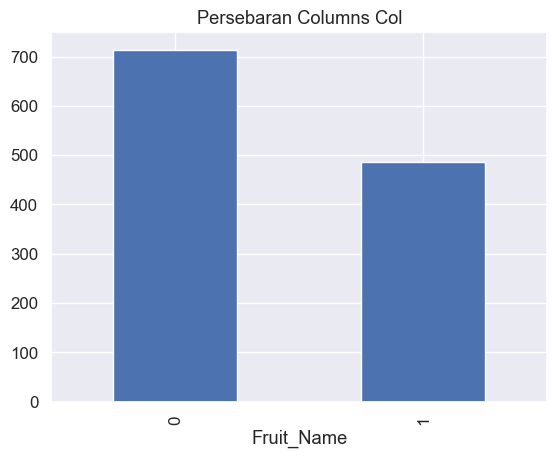

In [497]:
clean['Fruit_Name'].value_counts().plot(kind='bar').set_title("Persebaran Columns Col")
plt.show()

Resample Notes

In [498]:
# Memisahkan Ke kelas Major dan Minor
clean_major = clean[clean['Fruit_Name'] == 0]
clean_minor = clean[clean['Fruit_Name'] == 1]

In [499]:
# Mengambil baris dari mayoritas
target_outcome = len(clean_major)

In [500]:
# Sample Menggunakan Metode Random State
clean_minor_oversampled = clean_minor.sample(n=target_outcome, replace=True, random_state = 42)

In [501]:
# Menggabungkan clean major dan clean minor oversampled
clean_final = pd.concat([clean_major, clean_minor_oversampled])

In [502]:
clean_final['Fruit_Name'].value_counts()

Fruit_Name
0    714
1    714
Name: count, dtype: int64

In [503]:
buah_clean = clean_final['Fruit_Name'].value_counts()

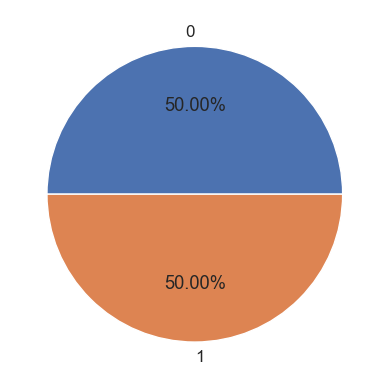

In [504]:
plt.pie(buah_clean, labels=buah_clean.index, autopct="%.2f%%")
plt.show()

<Axes: >

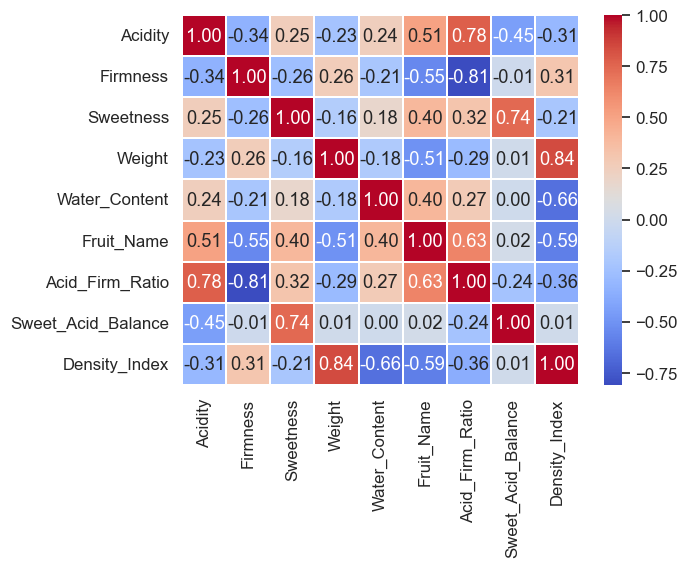

In [505]:
plt.Figure(figsize=(10, 8))
sns.heatmap(clean_final.corr(method='pearson'),
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=1.1)

<Axes: >

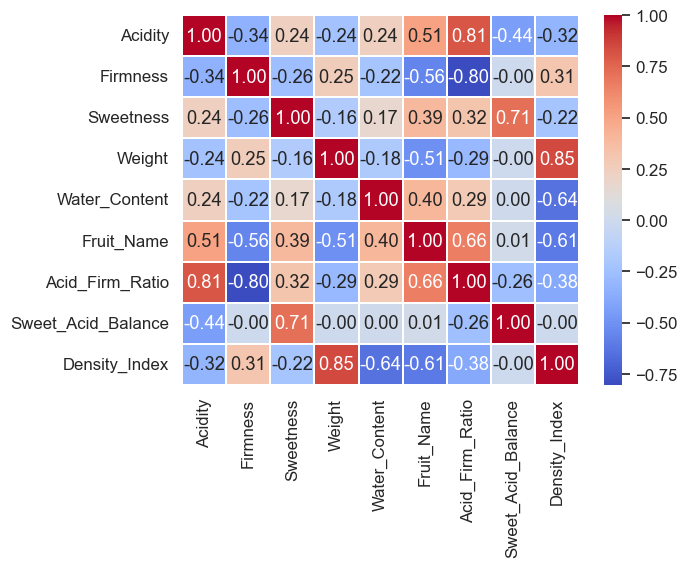

In [506]:
plt.Figure(figsize=(10, 8))
sns.heatmap(clean_final.corr(method='spearman'),
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=1.1)

## Normalisasi

In [507]:
feature = clean_final.drop(columns='Fruit_Name')
target = clean_final['Fruit_Name']

In [508]:
clean_final_minmax = ((feature - feature.min()) / (feature.max() - feature.min()))

In [509]:
clean_final_norm = pd.concat([clean_final_minmax, target], axis=1)

In [510]:
clean_final_norm.describe()

,Acidity,Firmness,Sweetness,Weight,Water_Content,Acid_Firm_Ratio,Sweet_Acid_Balance,Density_Index,Fruit_Name
count,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000
mean,0.521820,0.481216,0.514531,0.482112,0.514419,0.457691,0.503034,0.469029,0.500000
std,0.187791,0.177624,0.188751,0.183561,0.183457,0.242826,0.178294,0.185341,0.500175
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.386811,0.353632,0.389684,0.351994,0.390216,0.273278,0.373149,0.327801,0.000000
50%,0.512795,0.479701,0.505690,0.480294,0.515596,0.401102,0.503542,0.460581,0.500000
75%,0.650591,0.614316,0.643722,0.608237,0.632811,0.599449,0.622022,0.593361,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [511]:
clean_final_norm.head()

,Acidity,Firmness,Sweetness,Weight,Water_Content,Acid_Firm_Ratio,Sweet_Acid_Balance,Density_Index,Fruit_Name
0,0.562008,0.486111,0.460169,0.539472,0.624138,0.436364,0.428847,0.443983,0
3,0.731299,0.404915,0.405837,0.671946,0.356132,0.647934,0.270444,0.705394,0
4,0.193898,0.806624,0.592327,0.619214,0.376623,0.088154,0.785576,0.647303,0
5,0.075787,0.639957,0.433737,0.883958,0.576055,0.057300,0.723760,0.717842,0
6,0.571850,0.721154,0.473385,0.311105,0.172728,0.304132,0.433999,0.514523,0


In [512]:
clean_final_norm.describe().T.style.format("{:.2f}").background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Acidity,1428.00,0.52,0.19,0.00,0.39,0.51,0.65,1.00
Firmness,1428.00,0.48,0.18,0.00,0.35,0.48,0.61,1.00
Sweetness,1428.00,0.51,0.19,0.00,0.39,0.51,0.64,1.00
Weight,1428.00,0.48,0.18,0.00,0.35,0.48,0.61,1.00
Water_Content,1428.00,0.51,0.18,0.00,0.39,0.52,0.63,1.00
Acid_Firm_Ratio,1428.00,0.46,0.24,0.00,0.27,0.40,0.60,1.00
Sweet_Acid_Balance,1428.00,0.50,0.18,0.00,0.37,0.50,0.62,1.00
Density_Index,1428.00,0.47,0.19,0.00,0.33,0.46,0.59,1.00
Fruit_Name,1428.00,0.50,0.50,0.00,0.00,0.50,1.00,1.00


## Modelling

In [513]:
clean_final_norm.columns

Index(['Acidity', 'Firmness', 'Sweetness', 'Weight', 'Water_Content',
       'Acid_Firm_Ratio', 'Sweet_Acid_Balance', 'Density_Index', 'Fruit_Name'],
      dtype='object')

In [514]:
X = clean_final_norm[['Acidity', 'Firmness', 'Sweetness', 'Weight', 'Water_Content',
       'Acid_Firm_Ratio', 'Sweet_Acid_Balance', 'Density_Index']]
y = clean_final_norm['Fruit_Name']

In [ ]:
# fungsi untuk bagi data
def stratified_split_data(X, y, train_size=0.8, random_state=42, frac=None):  # frac untuk menentukan presentase
    np.random.seed(random_state)
    
    if frac:
        X = X.sample(frac=frac, random_state=random_state)
        y = y.loc[X.index]
    
    # buat list kosong untuk data train dan data test
    X_train_list, X_test_list = [], []   
    y_train_list, y_test_list = [], [] 
    
    # mengambil semua nilai unique y dan mengambil mulai dari index 0
    for class_value in np.unique(y):
        class_idx = np.where(y == class_value)[0]
        
        # random  split ratio
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        # menggabungkan data train dan test dengan split ratio
        X_train_list.append(X.iloc[idx[:split_ratio]])
        X_test_list.append(X.iloc[idx[split_ratio:]])
        y_train_list.append(y.iloc[idx[:split_ratio]])
        y_test_list.append(y.iloc[idx[split_ratio:]])

    # menggabungkan list menjadi dataframe 
    X_train = pd.concat(X_train_list).reset_index(drop=True)
    X_test = pd.concat(X_test_list).reset_index(drop=True)
    y_train = pd.concat(y_train_list).reset_index(drop=True)
    y_test = pd.concat(y_test_list).reset_index(drop=True)
    
    # return dataframe tain dan test
    return X_train, X_test, y_train, y_test

# stratified agar data terbai rata (agar data target tetap sama dengan data latih)
X_train, X_test, y_train, y_test = stratified_split_data(X, y)

In [ ]:
# buat class KNN
class KNN:
    
    # buat fungsi init
    def __init__(self, k=5):
        self.K = k
        
    # buat fungsi train
    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    # buat fungsi predict untuk setiap baris data (ambil dari _prediksi)
    def predict(self, X):
        y_prediksi = [self._prediksi(x) for x in X]
        return np.array(y_prediksi)
    
    # buat fungsi prediksi diambil menggunakan jarak terdekat Euclidean
    def _prediksi(self, x):
        # 1. Hitung Jarak kesemua data taining 
        jarak_titik = [self.jarak(x, x_train) for x_train in self.X_train]
        # 2. Urutkan berdasarkan Jarak terdekat, ambil sejumlah x
        k_terbaik =  np.argsort(jarak_titik)[:self.K]
        # 3. Ambil label K terbaik
        label_k_terbaik = [self.y_train[i] for i in k_terbaik]
        # 4. Voting yang paling banyak 
        hasil_voting = max(set(label_k_terbaik), key=label_k_terbaik.count)
        return hasil_voting
    
    # buat fungsi jarak 
    def jarak(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

### Matriks Evaluasi

predict test values

In [517]:
model = KNN(k=5)
model.train(X_train.values, y_train.values)
hasil = model.predict(X_test.values)
print(hasil)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


akurasi data test

In [518]:
# rumus akurasi test = jumlah hasil y_test / baris x_test
akurasi_test = np.sum(hasil == y_test) / len(X_test)
print(akurasi_test)

0.8601398601398601


In [519]:
# untuk akurasi train kita mabil model predict ke train.valuesnya
hasil_train = model.predict(X_train.values)

akurasi data train

In [520]:
# rumus sama akurasi train = jumlah hasil_train == y_train / baris x_train
akurasi_train = np.sum(hasil_train == y_train) / len(X_train)
print(akurasi_train)

0.9238178633975481


confusion matrix

In [521]:
# Fungsi untuk confusion matrix 
def confusion_matrix(y_test, y_prediksi): # melihat y_test dan y_prediksi
 TP = 0
 FP = 0
 FN = 0
 TN = 0

 # tebak dan asli
 for asli, tebak in zip(y_test, y_prediksi): # zip berfungsi untuk menggabungkan dua list atau lebih 
    if asli == 1 and tebak == 1: TP += 1 
    elif asli == 0 and tebak == 1: FP += 1 
    elif asli == 1 and tebak == 0: FN += 1 
    elif asli == 0 and tebak == 0: TN += 1 

# di return untuk dijadikan Array
 return np.array([[TN, FP], [FN, TP]])

In [522]:
# menjadikanya sebagai variabel cm
cm = confusion_matrix(y_test, hasil)
TP = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[0][0]

# Menghitung Rumus Precision TP / (TP+FP)
precision = TP / (TP + FP)
print(precision)

0.8456375838926175


In [523]:
# menjadikanya sebagai variabel cm
cm = confusion_matrix(y_train, hasil_train)
TP = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[0][0]

# Menghitung Rumus Precision TP / (TP+FP)
precision = TP / (TP + FP)
print(precision)

0.9201388888888888


In [524]:
cm = confusion_matrix(y_test, hasil)
TP = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[0][0]

# Rumus Recall TP / (TP + FN)
recall = TP / (TP + FN)
print(recall)

0.8811188811188811


In [525]:
# rumus fscore 2 * (precision * recall / precision+recall)
fscore  = 2*(precision * recall / precision + recall)
print(fscore)

3.5244755244755246


visualisasi Confusion Matrix

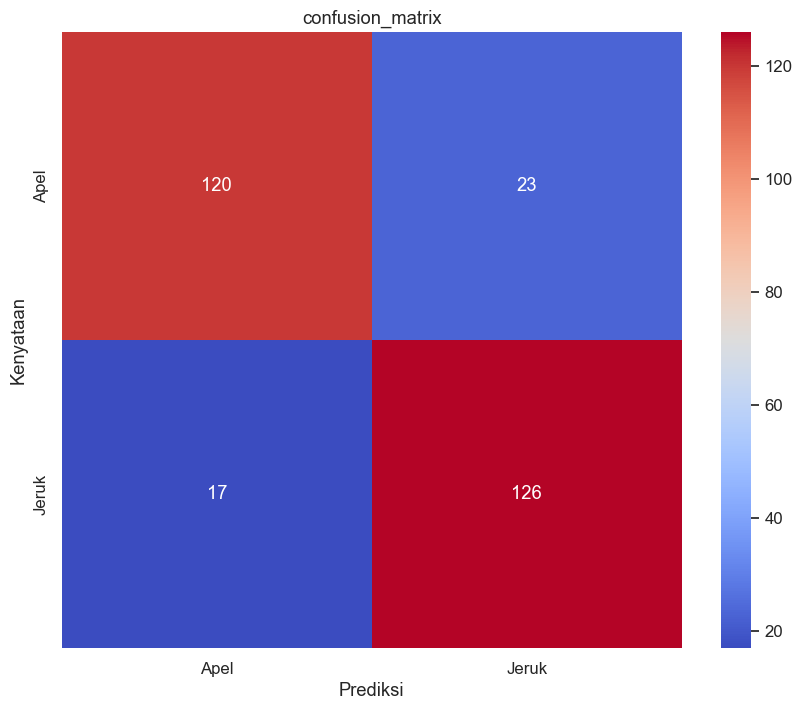

In [526]:
cm = confusion_matrix(y_test, hasil)

plt.figure(figsize=(10, 8))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='coolwarm',
            xticklabels=['Apel', 'Jeruk'], yticklabels =['Apel', 'Jeruk'])

plt.xlabel('Prediksi')
plt.ylabel('Kenyataan')
plt.title("confusion_matrix")
plt.show()

In [527]:
clean.columns

Index(['Acidity', 'Firmness', 'Sweetness', 'Weight', 'Water_Content',
       'Fruit_Name', 'Acid_Firm_Ratio', 'Sweet_Acid_Balance', 'Density_Index'],
      dtype='object')

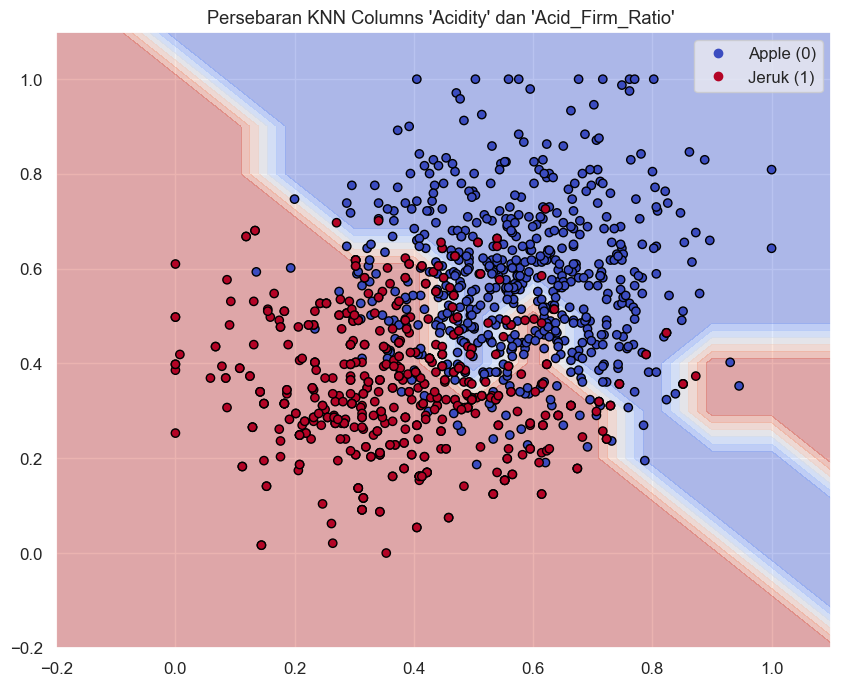

In [528]:
# mengambil column
x_mini = X_train.values[:, [1, 7]]
y_mini = y_train.values

# latih ulang model KNN Khusus Visualisasi
model_vis = KNN(k=5)
model_vis.train(x_mini, y_mini)

# Bikin grid
x_min, x_max = x_mini[:, 0].min() - 0.2, x_mini[:, 0].max() + 0.2
y_min, y_max = x_mini[:, 1].min() - 0.2, x_mini[:, 1].max() + 0.2

# bikin titik kordinat
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Prediksi dan beri warna pada Grid
z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

# gambar 
plt.figure(figsize=(10, 8))

# beri grid warna floor warna coolwarm
plt.contourf(xx, yy, z, cmap='coolwarm', alpha=0.4)

# Gambar titik asli 
gambar = plt.scatter(x_mini[:, 0], x_mini[:, 1], c=y_mini, cmap='coolwarm', edgecolors='black')

plt.title("Persebaran KNN Columns 'Acidity' dan 'Acid_Firm_Ratio' ")
plt.legend(handles = gambar.legend_elements()[0], labels = ['Apple (0)', 'Jeruk (1)' ], loc = "upper right")
plt.show()

### Kesimpulan:

- dari fitur:

1. Tingkat Keasaman
2. Bobot
3. Tingkat Kemanisan
4. Kandungan Air

buah apel lebih unggul


- Mencoba Metode Capping untuk Mempertahankan jumlah data
- kami belajar bahwa KNN tidak tergantung dengan korelasi
- Memahami Standar Deviasi